In [1]:
# Define paths
image_folder = "D:/Working papers/Colon Diesease/Datasets/EndoTech/EndoTect/IMG/" # Replace with your image folder path
feature_folder =  "D:/Working papers/Colon Diesease/Datasets/EndoTech/KS/" # Folder to save extracted features

In [2]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import shutil

In [3]:
# Load EfficientNetB0 model
model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Extract features from all images
feature_list = []
image_paths = []

for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    features = extract_features(img_path)
    feature_list.append(features)
    image_paths.append(img_path)

# Convert features to numpy array
features_array = np.array(feature_list)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)

# Apply K-Means clustering
n_clusters = 2  # Assuming you want to cluster into 2 groups
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(scaled_features)


features_file_path = "features.npy"
labels_file_path = "labels.npy"
directory = os.path.dirname(feature_folder)
if not os.path.exists(directory):
    os.makedirs(directory)

# Check if the file exists; if not, create an empty file (or initialize it with data if needed)
if not os.path.isfile(features_file_path):
    # For example, saving an empty array initially if needed
    np.save(features_file_path, np.array([]))  # Save an empty array or appropriate initial data
    print(f"File created at: {features_file_path}")
else:
    print("File already exists.")
    
if not os.path.isfile(labels_file_path):
    # For example, saving an empty array initially if needed
    np.save(labels_file_path, np.array([]))  # Save an empty array or appropriate initial data
    print(f"File created at: {labels_file_path}")
else:
    print("File already exists.")

# Save features and labels
np.save(os.path.join(feature_folder, feature_folder), features_array)
np.save(os.path.join(feature_folder, labels_file_path), labels)

# Create directories for clusters
for i in range(n_clusters):
    os.makedirs(os.path.join(image_folder, f'cluster_{i}'), exist_ok=True)

# Move images to corresponding cluster folders
for img_path, label in zip(image_paths, labels):
    img_name = os.path.basename(img_path)
    shutil.move(img_path, os.path.join(image_folder, f'cluster_{label}', img_name))

print("Feature extraction and clustering complete. Images have been organized into clusters.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━

In [10]:
import os

# List images in cluster_0
cluster_0_images = os.listdir(os.path.join(image_folder, 'cluster_0'))
print("Images in cluster_0:")
for img in cluster_0_images:
    print(img)

# List images in cluster_1
cluster_1_images = os.listdir(os.path.join(image_folder, 'cluster_1'))
print("Images in cluster_1:")
for img in cluster_1_images:
    print(img)


Images in cluster_0:
03e15c74-4234-4074-bd5b-b4b81834d3d6.jpg
04c3a34e-a160-4421-827e-89671761ef82.jpg
0a25da23-787f-47ce-877e-2934275b0801.jpg
0a64cf79-80be-436a-bb3d-978b586a4a4a.jpg
0ab286ad-3b4f-4c5d-af02-314a2f41a518.jpg
0c12ae3c-5e78-479b-adde-a2d456eb4e64.jpg
0cb52cde-7faf-4359-96f4-c2cb3ed32819.jpg
0cf59388-36a8-49d6-934f-cbbd1364d93c.jpg
0dcfc0b4-844c-49c6-b329-3ff896cf941c.jpg
0e577e7c-2d63-419f-9277-c7aa18ef7d2d.jpg
0ea7527e-de2b-4f2a-bcb4-dc37ae1888b6.jpg
0ef6ab1d-2a5f-47d7-b84c-611a0f26e527.jpg
0fa67b7f-16d5-44b1-9473-8080cd170598.jpg
1a1324b1-f4ee-4fbd-b23e-3d2914c07647.jpg
1a5380d4-651a-42fc-b8c2-d28f9039782c.jpg
1a972bcc-832f-4207-a1a5-0df314e97a53.jpg
1aba5353-d5a2-42e3-ad7f-720405d3cdce.jpg
1b3165c1-3a4c-4f53-892b-27d309af1277.jpg
1b6bbfbd-36d1-4bd6-9e32-03efbde62264.jpg
1c4ef1be-c550-4825-8d23-e3abf30642d7.jpg
1e39d517-81be-4e31-b43e-7cab37d20444.jpg
1fb09ac3-7347-4aaa-9b9e-e7c51ce3c643.jpg
1fb34ce4-3067-42ff-b941-b887177d0d2b.jpg
2bbe0fb3-08ce-4586-8e67-88dcf9ccfcbf

In [11]:
import os

# Define paths to cluster directories
cluster_0_dir = os.path.join(image_folder, 'cluster_0')
cluster_1_dir = os.path.join(image_folder, 'cluster_1')

# Count the number of images in each cluster
def count_images(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Get counts
count_cluster_0 = count_images(cluster_0_dir)
count_cluster_1 = count_images(cluster_1_dir)

print(f"Number of images in cluster_0: {count_cluster_0}")
print(f"Number of images in cluster_1: {count_cluster_1}")


Number of images in cluster_0: 711
Number of images in cluster_1: 489


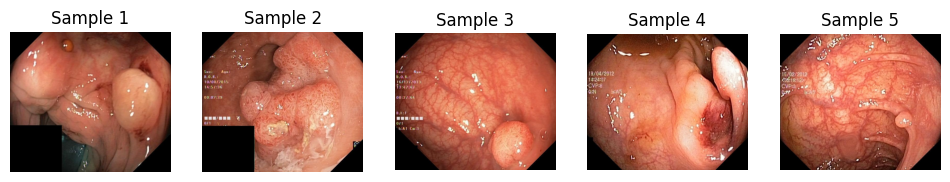

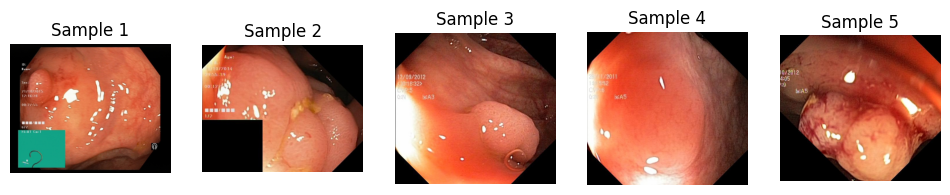

In [12]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(directory, num_images=5):
    images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    sampled_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(12, 6))
    for i, img_name in enumerate(sampled_images):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Sample {i + 1}")
        plt.axis('off')
    plt.show()

# Show sample images from each cluster
show_sample_images(cluster_0_dir, num_images=5)
show_sample_images(cluster_1_dir, num_images=5)


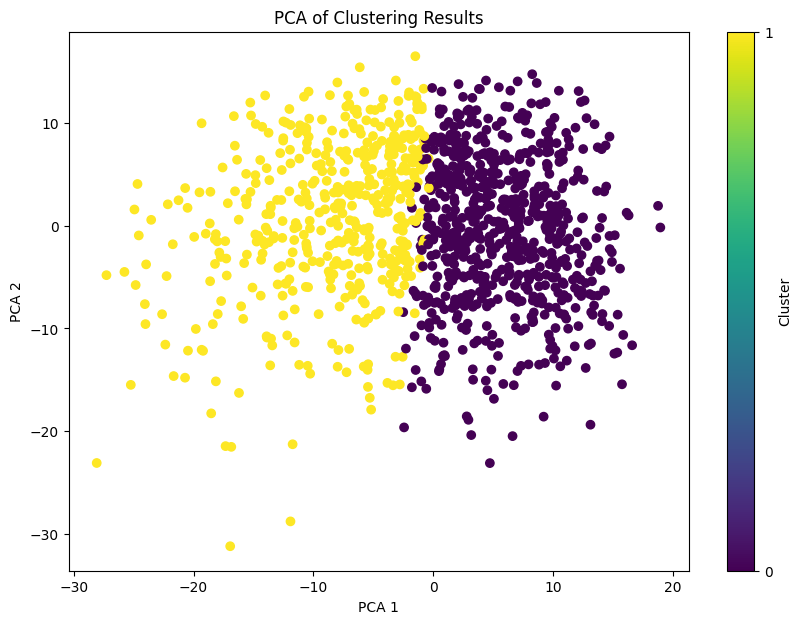

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1], label='Cluster')
plt.title('PCA of Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


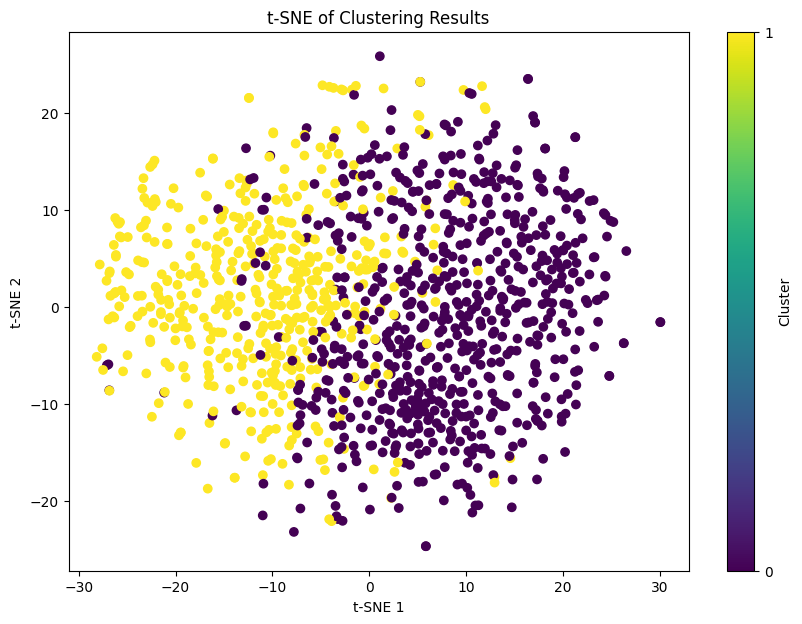

In [14]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_features = tsne.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1], label='Cluster')
plt.title('t-SNE of Clustering Results')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
